In [377]:
import math

In [378]:
def H_x(counter,sum, w, datax = [], datay = [] ): # 1 dimensional H(x) function, GD
    if counter<len(datax):    
        sum+=math.pow(w*float(datax[counter])-float(datay[counter]),2)
        counter+=1
        return H_x(counter, sum, w, datax, datay)
    else:
        return sum/(len(datax)-1)

In [379]:
x0 = []
x1 = []
x2 = []
x3 = []
x4 = []
x5 = []
x6 = []
y = []

In [380]:
Csv = open('Real estate.csv','r')

In [381]:
import csv

In [382]:
read = csv.reader(Csv)

In [383]:
for row in read:
    for j in range(8):
        if j == 0:
            x0.append(row[j])
        elif j == 1:
            x1.append(row[j])
        elif j == 2:
            x2.append(row[j])
        elif j == 3:
            x3.append(row[j])
        elif j == 4:
            x4.append(row[j])
        elif j == 5:
            x5.append(row[j])
        elif j == 6:
            x6.append(row[j])
        elif j == 7:
            y.append(row[j])

In [384]:
print(H_x(1,0,0,x1,y))

1627.1843961352647


In [385]:
for i in range(10):
    w = 1/math.pow(10,i)
    print(H_x(1,0,w,x1,y))# w should be 0.01 for x1

3901475.799630968
26862.848626700972
503.2588462626615
1478.3169214187142
1611.9328994663178
1625.6555989764
1627.0314799444582
1627.169104151435
1627.1828669332351
1627.184243215026


In [386]:
def W_SGD(counter, sum, w, alpha, datax = [], datay = []):# 1D GSD
    if counter<len(datax):    
        sum+=(w*float(datax[counter])-float(datay[counter]))*float(datax[counter])
        counter+=1
        return W_SGD(counter, sum, w, alpha, datax, datay)
    else:
        return w - alpha*(sum/(len(datax)-1))

In [387]:
print(W_SGD(1 , 0, 0.01, 0.01, x1, y))

359.33433199579247


In [388]:
import numpy as np

In [389]:
xtot = []
ytot = []

In [390]:
Csv = open('Real estate.csv','r')

In [391]:
read = csv.reader(Csv)

In [392]:
for row in read:
    temp = []
    for j in range(8):
        if j == 6:
            ytot.append(row[j])
            xtot.append(temp)
        else:
            temp.append(row[j])

In [393]:
xdata = np.array(xtot) 
ydata = np.array(ytot)

In [394]:
def W_SGD2(counter, sum, w, alpha, datax = [], datay = []):# 1D GSD
    temp = []
    if counter<len(datax):
        for i in range(8):
            temp.append(float(w))
        W = np.array(temp)
        W1 = W.transpose()
        #sum = np.subtract(np.multiply(datax[counter],W),datay[counter])
        sum += (W1*(datax[counter])-(datay[counter]))*(datax[counter])
        counter+=1
        return W_SGD2(counter, sum, w, alpha, datax, datay)
    else:
        return w - alpha*(sum/(len(datax)-1))

In [395]:
for i in range(10): # w = 0.001 or 0.01 seemingly is the best for all of them
    w = i/math.pow(10,i)
    cost1 = W_SGD(1,0,w,0.01,x1, y)
    cost2 = W_SGD(1,0,w,0.01,x2, y)
    cost3 = W_SGD(1,0,w,0.01,x3, y)
    cost4 = W_SGD(1,0,w,0.01,x4, y)
    cost5 = W_SGD(1,0,w,0.01,x5, y)
    cost6 = W_SGD(1,0,w,0.01,x6, y)
    print(cost1, cost2, cost3, cost4, cost5, cost6)

764.6012178768113 6.401649516908211 296.2625778622466 1.7832850241545886 9.484206131594192 46.15969548190822
-3288.0676409333814 6.058439516908214 -2467.518605214862 1.8578671497584545 8.96075351519364 31.489337389848576
-45.932553885227065 6.333007516908213 -256.4936587531755 1.7982014492753613 9.379515608314083 43.22562386349629
643.0211521125062 6.391353216908213 213.349142369933 1.7855224879227076 9.468502553102184 45.71958473914645
748.3905424415713 6.400276676908216 285.207453129938 1.7835833526570062 9.482112321128593 46.10101404953995
762.5748834474066 6.401477911908219 294.8806872707076 1.7833223152173912 9.483944405286001 46.15236030286213
764.3580577452826 6.401628924308214 296.0967509912615 1.7832894990821242 9.484174724437212 46.15881526042268
764.5728491948001 6.4016471144382106 296.24323139396455 1.7832855462294666 9.484202467425897 46.15959278940157
764.5979757417248 6.401649242340207 296.2603668372996 1.7832850838202892 9.484205712832107 46.159683745621706
764.60085313

In [396]:
print(x4[0])

X4 number of convenience stores


In [397]:
def W_SGD2(counter, sum, w, xpoint, alpha, datax = [], datay = []):# 1D GSD, 
    if counter<len(datax):
        hx = 0
        for i in range(7):
            hx += w*float(datax[counter][i])
        sum += (hx-float(datay[counter]))*(float(datax[counter][xpoint]))
        counter += 1
        return W_SGD2(counter, sum, w, xpoint, alpha, datax, datay)
    else:
        return w - alpha*(sum/(len(datax)-1))

In [398]:
print(W_SGD2(1,0,0.01,1,0.01,xdata, ydata))

1764.340863232742


In [399]:
for i in range(10): #0.001 = w seems to be the best way to reduce the cost
    w = 1/math.pow(10,i)
    print(W_SGD2(1,0,w,6,0.01,xdata, ydata))

-1125.9896839249757
-71.05524245878026
34.43820168783936
44.98754610250134
46.042480543967514
46.14797398811417
46.158523332528816
46.15957826697022
46.15968376041441
46.15969430975883


In [400]:
import matplotlib.pyplot as plt

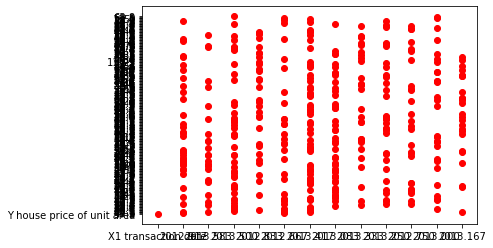

In [401]:
plt.plot(x1,y,'ro')
plt.show()

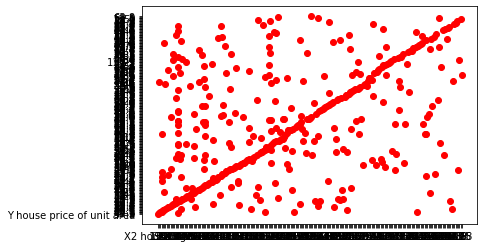

In [402]:
plt.plot(x2,y,'ro')
plt.show()

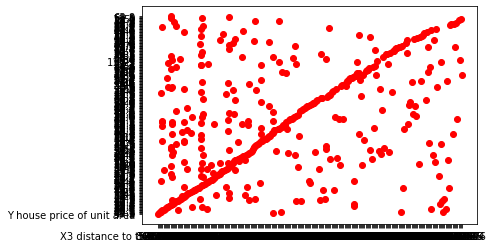

In [403]:
plt.plot(x3,y,'ro')
plt.show()

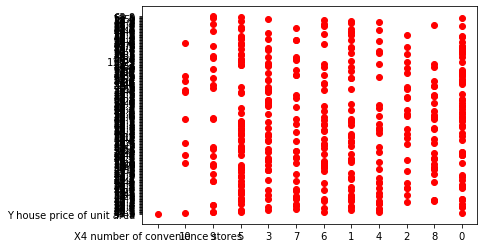

In [404]:
plt.plot(x4,y,'ro')
plt.show()

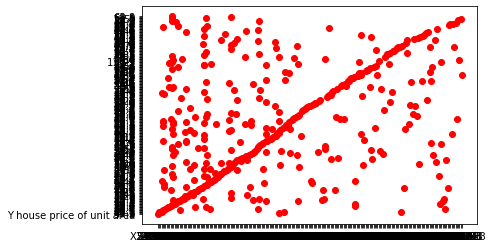

In [408]:
plt.plot(x5,y,'ro')
plt.show()

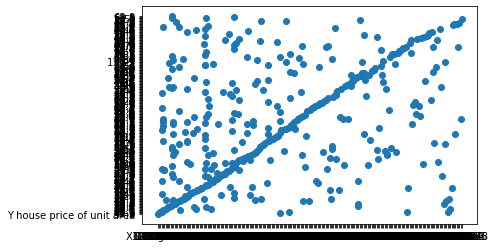

In [409]:
plt.scatter(x6,y)
plt.show()